#Elección de un solo dataset y práctica de gráficos



In [116]:
# Conexión con Google Drive
from google.colab import drive
import os
drive.mount('/content/gdrive/')
# Definimos el path de los dataset
path = "/content/gdrive/MyDrive/Data_Sciense_Coder_Patricia_Lopez/"

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [117]:
import pandas as pd

In [118]:
#Lectura del dataset
df= pd.read_csv(path+'test_values_.csv')
df.head()

,row_id,country,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,literacy,...,financially_included,active_bank_user,active_mm_user,active_formal_nbfi_user,active_informal_nbfi_user,nonreg_active_mm_user,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year,poverty_probability
0,0,C,False,18,True,True,P,Other,1.0,True,...,True,True,False,False,False,False,1,0,1,0.515
1,1,C,True,30,True,True,P,Other,1.0,True,...,True,True,False,False,False,False,1,0,0,0.981
2,2,A,False,20,True,True,Q,Spouse,1.0,True,...,False,False,False,False,False,False,0,0,0,0.982
3,3,A,False,61,False,True,Q,Head,0.0,False,...,False,False,False,False,False,False,0,0,0,0.879
4,4,D,False,26,True,True,X,Spouse,1.0,True,...,False,False,False,False,False,False,1,0,3,0.796


##Gráficos con Matplotlib

El primer grafico es de puntos, muestra la relacion entre la edad y la probabilidad de pobreza dado un solo nivel de educacion, el mas alto, en la anterior grafica no se detecta una marcada relacion de las dos variables.
El segundo grafico es de barras y compara el número de personas que estan o no incluidas financieramente observandose que estas cantidades son muy similares.
El tercero es un piechart que muestra la proporcion de los diferentes paises de los cuales son los datos y se nota una distribucion homogenea de los datos en los diferentes paises.

In [119]:
import matplotlib as mpl
import matplotlib.pyplot as plt

Text(0, 0.5, 'edad')

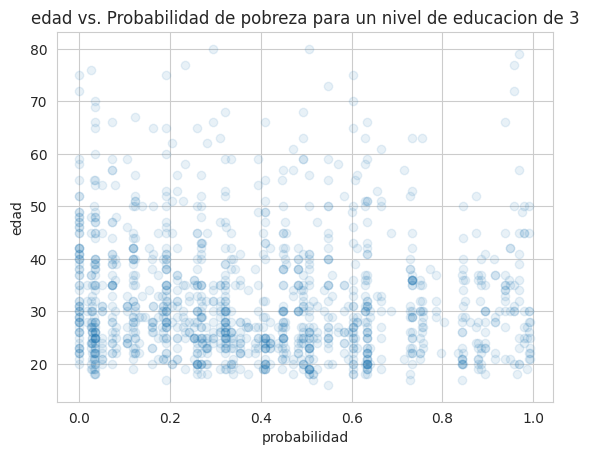

In [120]:
df_filtrado = df[df['education_level'] == 3.0]

edades = df_filtrado['age']
pp = df_filtrado['poverty_probability']
fig, ax = plt.subplots()
ax.scatter(pp, edades, alpha=0.1)
ax.set_title('edad vs. Probabilidad de pobreza para un nivel de educacion de 3')
ax.set_xlabel('probabilidad')
ax.set_ylabel('edad')

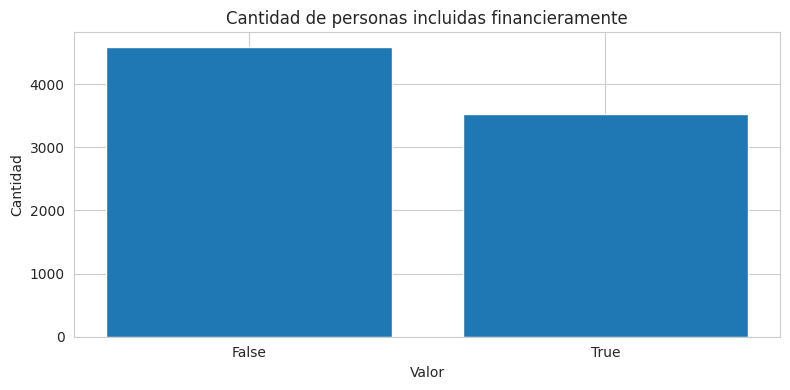

financially_included
False    4589
True     3528
Name: count, dtype: int64

In [121]:
df_filtrado = df[df['poverty_probability'] > 0.5]
fig, ax = plt.subplots(figsize=(8,4))
conteo_booleanos = df_filtrado['financially_included'].value_counts()
plt.bar(conteo_booleanos.index.astype(str), conteo_booleanos.values)
plt.xlabel('Valor')
plt.ylabel('Cantidad')
plt.title('Cantidad de personas incluidas financieramente')
plt.tight_layout()
plt.show()

conteo_booleanos

Text(0.5, 1.0, 'Países')

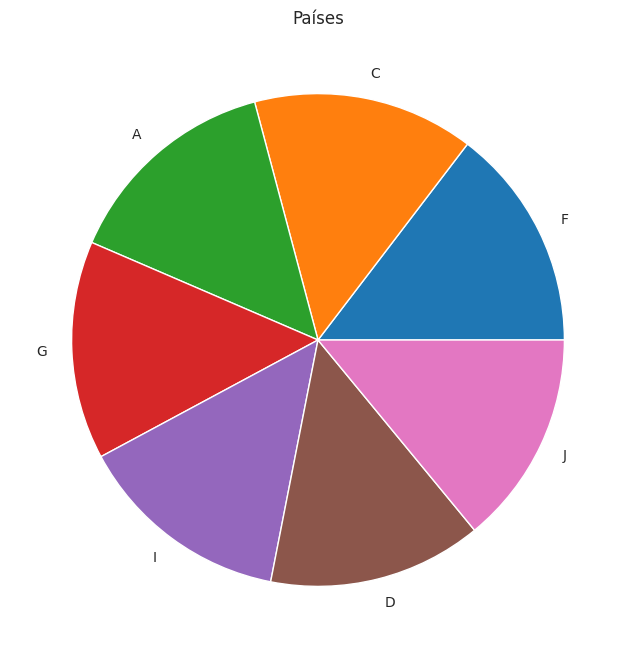

In [122]:
conteo_paises = df['country'].value_counts()
nombres = ['F','C','A','G','I','D','J']
fig,ax = plt.subplots(figsize =(8, 8))
ax.pie(conteo_paises, labels = nombres)
ax.set_title('Países')

Gráficos con seaborn

El primer grafico es un histograma que muestra la frecuencia de las distintas edades en los datos observando que la mayoria de las edades se encuentran entre 20 y 40 años.
El segundo grafico muestra las mismas frecuencias que el primero pero diferenciando los datos si provienen de una persona con genero femenino o no, en las graficas no se ve una gran diferencia en la disperción de las edades.
El tercer grafico es un diagrama de caja que muestra la distribucion de la probabilidad de pobreza diferenciando entre las distintas relaciones de la persona con el cabeza de familia de su nucleo familiar, en el se puede notar que la relacion hermana/hermano supone una mayor probabilidad de pobreza.

In [123]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

<Axes: xlabel='age', ylabel='Count'>

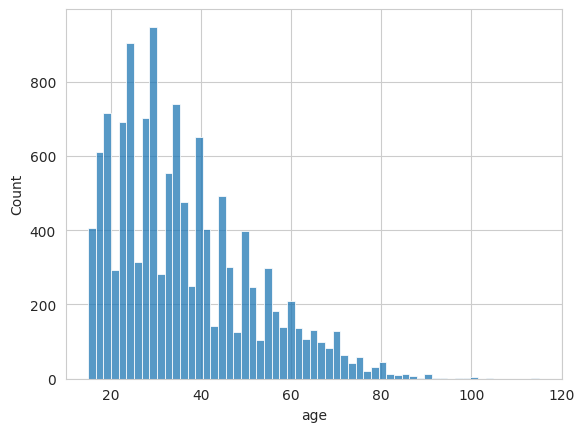

In [124]:
sns.histplot(data=df, x="age")

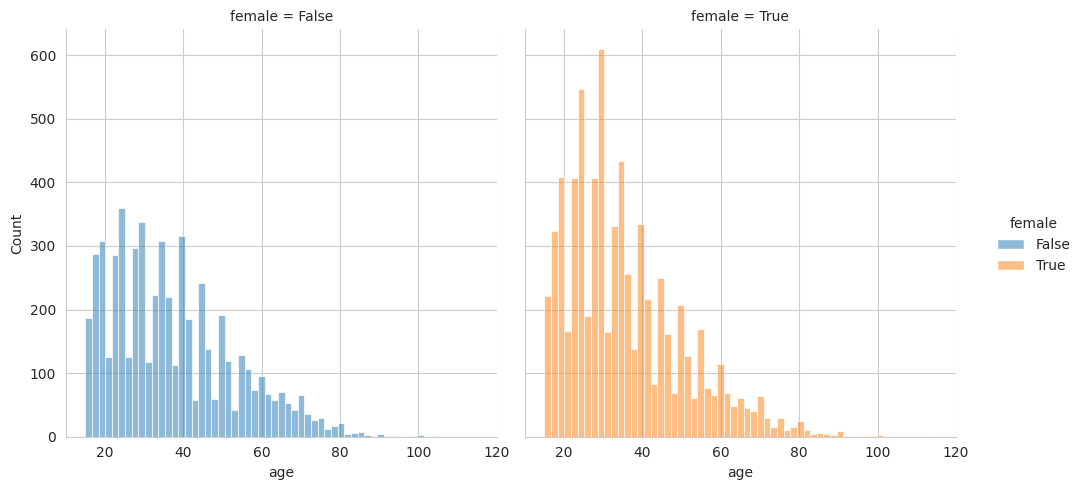

In [125]:
sns.displot(data=df, x="age",hue="female",col="female")

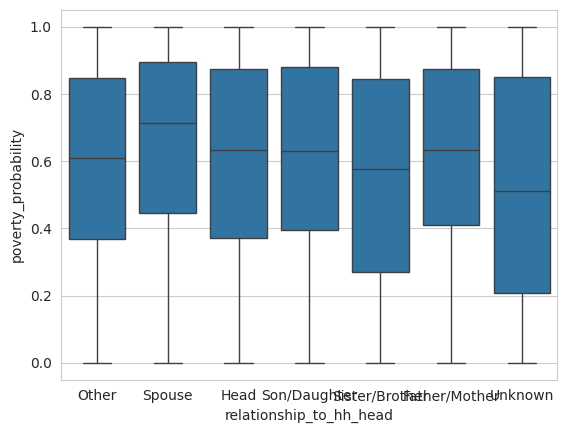

In [126]:
ax = sns.boxplot(x="relationship_to_hh_head", y="poverty_probability", data=df)

#Abstract

El dataframe "df" usado en este proyecto incluye el Índice de Probabilidad de Pobreza (PPI), que estima el estado de pobreza de un individuo utilizando 10 preguntas sobre las características de un hogar y la propiedad de activos, y ademas incluye otros indicadores socioeconómicos que provienen de las encuestas de hogares Financial Inclusion Insights realizadas por InterMedia.
Lo anterior se registra para individuos de 7 paises distintos.
Las respuestas a las 10 preguntas acerca de las características y propiedad de bienes de un hogar se puntúan para calcular la probabilidad de que el hogar esté viviendo por debajo de la línea de pobreza, esto es, vivan por debajo del umbral de 2,50 dólares al día.
Con los datos anteriores se pretende predecir la probabilidad de pobreza de una persona de un determinado pais, tambien observar la relacion de las distintas variables con esta probabilidad lo que se realizara con un estudio grafico y analitico.

#Contexto comercial, Problema Comercial y Contexto analítico

###Contexto Comercial:
Podria ser que una organización del gobierno o una ONG está interesada en ver los factores que contribuyen a la pobreza en diferentes países. El objetivo seria desarrollar estrategias efectivas para reducir la pobreza y mejorar las condiciones de vida de las poblaciones más vulnerables diseñando políticas y programas en funcion de las observaciones y analisis de los datos.
###Problema Comercial:
El problema central es la existencia de la pobreza en distintos países y la necesidad de comprender qué variables demográficas y socioeconómicas están más estrechamente relacionadas con la probabilidad de que un individuo caiga en la pobreza. Se busca responder preguntas como: ¿Cuáles son los factores que más influyen en la probabilidad de pobreza? ¿Existen diferencias significativas entre géneros, edades o grupos religiosos en términos de su propensión a la pobreza? ¿Cómo pueden estos datos ayudar a desarrollar políticas específicas para reducir la pobreza en diferentes regiones?

###Contexto Analítico:
El proyecto se basa en un DataFrame que contiene información sobre la probabilidad de pobreza de individuos en múltiples países. Este conjunto de datos también incluye variables demográficas como género, edad, religión, nivel educativo, ubicación geográfica, entre otros. Se emplearán técnicas de Data Science, incluyendo análisis exploratorio de datos, modelado predictivo y métodos de visualización, para identificar patrones, relaciones y correlaciones significativas entre estas variables.

# Preguntas/Hipótesis

Al observar los datos expuestos en este Data Set es de interes llegar a contestar las siguentes preguntas:
###Sobre la relación entre el nivel educativo y el índice de pobreza:

 ¿Existe alguna relación entre el nivel educativo y el índice de pobreza de la población? ¿Las personas con niveles educativos más altos tienden a tener un índice de pobreza más bajo?
### Sobre la variación del índice de pobreza según el país de residencia:

¿Se observan diferencias significativas en el índice de pobreza entre los diferentes países en la muestra? ¿Hay países donde la población tiende a tener índices de pobreza más altos o más bajos?
### Sobre el impacto del género en la pobreza:

¿Hay diferencias significativas en el índice de pobreza entre géneros? ¿Las mujeres tienen índices de pobreza más altos que los hombres?

Si ademas se toma en cuenta el impacto que puede tener el nivel de educación:
¿Existe una relación entre el nivel educativo y la brecha de género en el índice de pobreza? ¿La educación puede ser un factor clave para reducir las disparidades de pobreza entre géneros?

###Observaciones sobre interacción entre múltiples variables:

¿Cómo se relacionan el nivel educativo, la edad y el género con el índice de pobreza? ¿Hay interacciones complejas entre estas variables que puedan explicar mejor la situación económica de la población?

#Objetivo


Se buscara predecir la probabilidad de pobreza al utilizar algoritmos de machine learning para predecir esta probabilidad de diferentes individuos basados en datos demográficos como género, edad, religión, nivel educativo, entre otros.

Realizar un análisis estadístico y exploratorio para identificar los factores más influyentes o determinantes en la probabilidad de pobreza. Esto podría incluir la evaluación de la importancia relativa de variables como edad, género, nivel educativo, ubicación geográfica.

Tambien utilizar técnicas de clustering para identificar grupos demográficos específicos que puedan estar en mayor riesgo de caer en la pobreza.


#Limpieza de datos
Se revisaron las columnas y a continuacion se muestran algunos ejemplos de columnas que no aportan valores por lo que seran eliminadas

In [ ]:
len(df['bank_interest_rate'])


12600

In [ ]:
cantidad_nans = df['bank_interest_rate'].isna().sum()
cantidad_nans


12311

In [ ]:
cantidad_nans = df['mm_interest_rate'].isna().sum()
cantidad_nans

12449

In [ ]:
#Eliminacion de columnas vacias (NaN)
columnas_a_eliminar = ['bank_interest_rate','mm_interest_rate','mfi_interest_rate','other_fsp_interest_rate','share_hh_income_provided']
# Eliminacion de las columnas especificadas
df_dep = df.drop(columns=columnas_a_eliminar)


print(df_dep.head())

   row_id country  is_urban  age  female  married religion  \
0       0       C     False   18    True     True        P   
1       1       C      True   30    True     True        P   
2       2       A     False   20    True     True        Q   
3       3       A     False   61   False     True        Q   
4       4       D     False   26    True     True        X   

  relationship_to_hh_head  education_level  literacy  ...  \
0                   Other              1.0      True  ...   
1                   Other              1.0      True  ...   
2                  Spouse              1.0      True  ...   
3                    Head              0.0     False  ...   
4                  Spouse              1.0      True  ...   

   financially_included  active_bank_user  active_mm_user  \
0                  True              True           False   
1                  True              True           False   
2                 False             False           False   
3               

#EDA (Análisis Exploratorio de Datos)

In [ ]:
#Importar seaborn
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

### Relación entre el nivel educativo y el índice de pobreza(ppi):
¿El nivel educativo de las personas influye en el índice de pobreza?

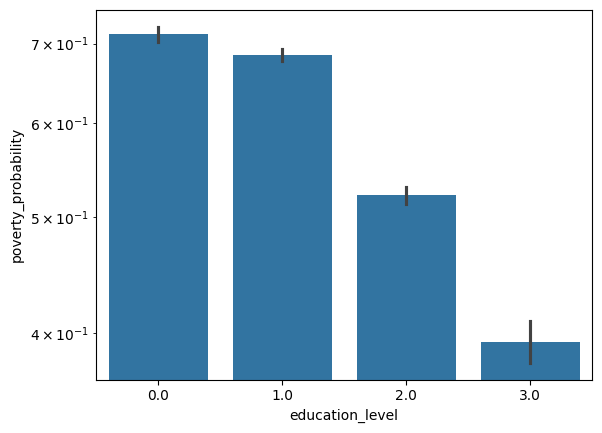

In [ ]:
#ppi comparado para diferentes niveles de educacion
sns.barplot(data=df_dep,x='education_level',y='poverty_probability')
plt.yscale('log')

En este grafico de barras se utiliza una escala logaritmica para mostrar los valores de la probabilidad ya que esta funcion modifica estos valores y al ser una funcion que crece muy rapido para valores menores a 1 muestra visualmente mejor la diferencia de estas probabilidades.
Lo que se observa es que al aumentar el nivel educativo disminuye la probabilidad de pobreza de una persona, en los dos estudios siguientes se tratará de saber mas sobre este resultado.

<Axes: xlabel='education_level', ylabel='poverty_probability'>

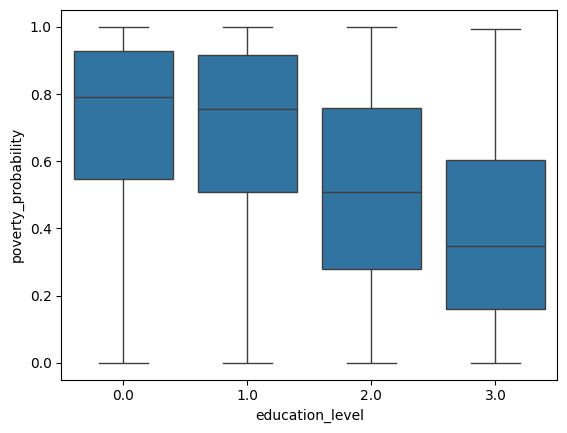

In [ ]:
#Observacion de la influencia de la edad en la relacion entre nivel educativo y la ppi
#A continuacion se realizaran 5 graficos de puntos con sus curvas de regresion sobre la relacion educacion-pobreza
df_1=df_dep[(df_dep['age'] >=0) & (df_dep['age'] <20)]
sns.boxplot(data=df_dep,x='education_level', y='poverty_probability')

<Axes: xlabel='education_level', ylabel='poverty_probability'>

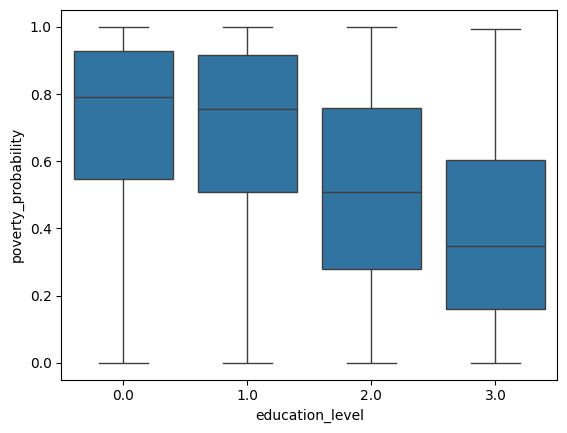

In [ ]:
df_2=df_dep[(df_dep['age'] >=20) & (df_dep['age'] <40)]
sns.boxplot(data=df_dep,x='education_level', y='poverty_probability')

<Axes: xlabel='education_level', ylabel='poverty_probability'>

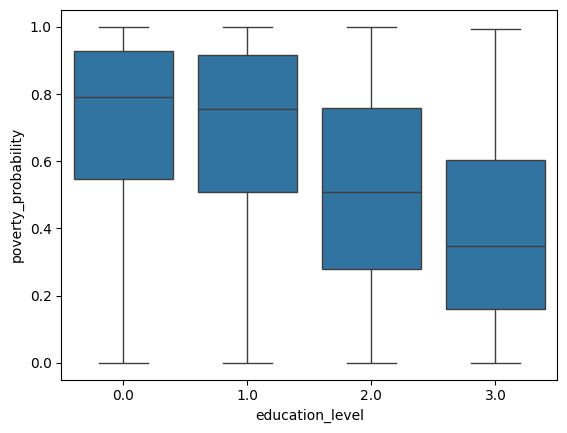

In [ ]:
df_3=df[(df_dep['age'] >=40) & (df_dep['age'] <60)]
sns.boxplot(data=df_dep,x='education_level', y='poverty_probability')

<Axes: xlabel='education_level', ylabel='poverty_probability'>

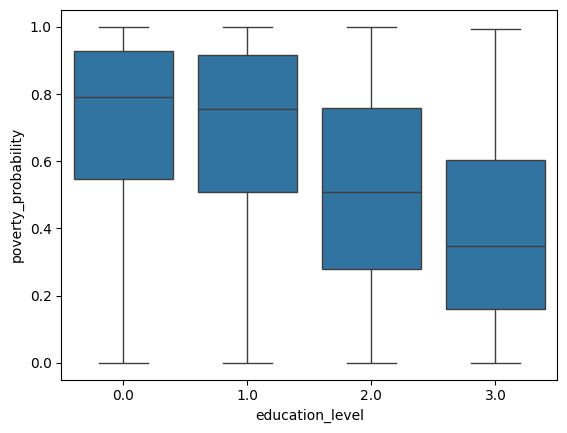

In [ ]:
df_4=df_dep[(df_dep['age'] >=60) & (df_dep['age'] <80)]
sns.boxplot(data=df_dep,x='education_level', y='poverty_probability')

<Axes: xlabel='education_level', ylabel='poverty_probability'>

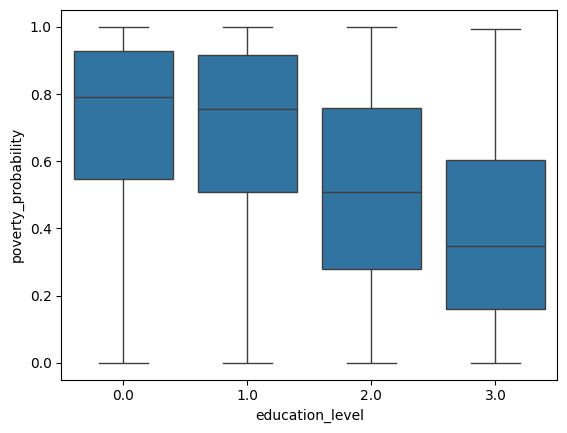

In [ ]:
df_5=df_dep[(df_dep['age'] >=80) & (df_dep['age'] <100)]
sns.boxplot(data=df_dep,x='education_level', y='poverty_probability')

<Axes: xlabel='education_level', ylabel='poverty_probability'>

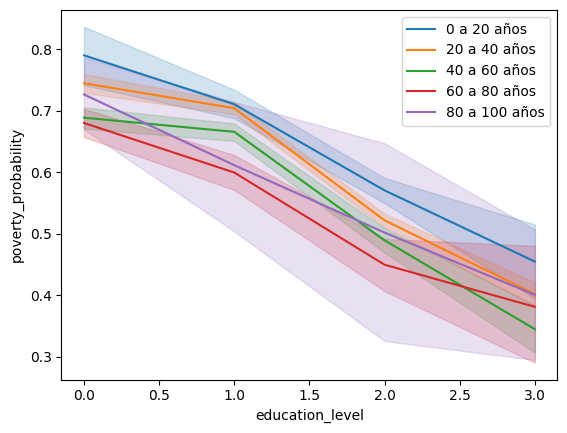

In [ ]:
#Grafico conjunto de las 5 curvas recolectadas anteriormente
sns.lineplot(x='education_level', y='poverty_probability', data=df_1, label='0 a 20 años')
sns.lineplot(x='education_level', y='poverty_probability', data=df_2, label='20 a 40 años')
sns.lineplot(x='education_level', y='poverty_probability', data=df_3, label='40 a 60 años')
sns.lineplot(x='education_level', y='poverty_probability', data=df_4, label='60 a 80 años')
sns.lineplot(x='education_level', y='poverty_probability', data=df_5, label='80 a 100 años')

Aunque para todos los rangos de edad de los graficos anteriores la tendencia de baja de pobreza al aumentar la educacion se mantuvo, Dado que la edad de una persona es un factor determinante muchas veces para su nivel educativo, en el proximo grafico tomare edades entre 40 y 80 años para tratar de que la edad no influya en el nivel educativo y,por lo tanto, tampoco en la relacion educacion-pobreza.

<Axes: xlabel='education_level', ylabel='poverty_probability'>

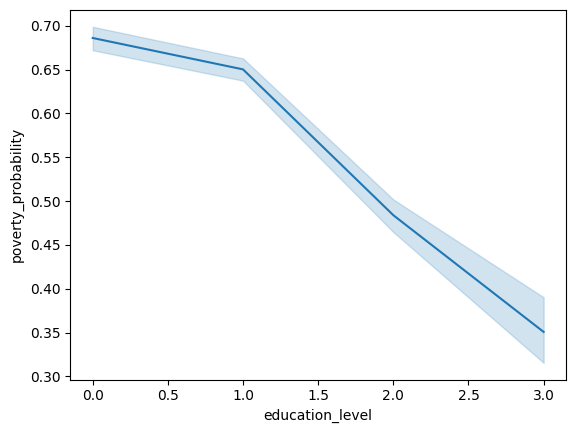

In [ ]:
#Comparacion del ppi para diferentes niveles de educacion filtrando las edades de la poblacion entre 40 y 80 años
df_filtrado =df_dep[(df_dep['age'] >= 40) & (df_dep['age'] <= 80)]
sns.lineplot(data=df_filtrado,x='education_level',y='poverty_probability')


Lo anterior muestra que para este margen de edades la tendencia es que al aumentar la educacion de una persona disminuye su indice de pobreza drasticamente por ejemplo la diferencia entre tener un nivel cero y uno 3 en educacion es de aproximadamente es del 35% , para seguir ahondando en el estudio a continuacion se revisaran los datos del dataset para limpiarlo de posibles datos nulos.

<ipython-input-25-1a6272e2f118>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtrado =df_l[(df_l['age'] >= 40) & (df['age'] <= 80)]


<Axes: xlabel='education_level', ylabel='poverty_probability'>

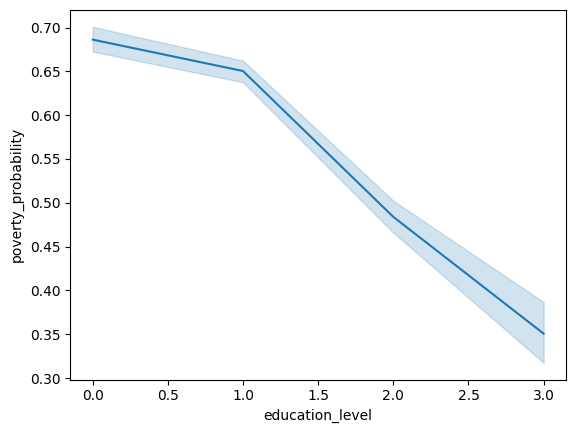

In [ ]:
limpiar_columna_educacion = 'education_level'
df_l = df.dropna(subset=[limpiar_columna_educacion])
df_filtrado =df_l[(df_l['age'] >= 40) & (df['age'] <= 80)]
sns.lineplot(data=df_filtrado,x='education_level',y='poverty_probability')


Lo que se observa es que los datos nulos o no validos en la columna de nivel educativo no influyen en el grafico y se obtienen iguales conclusiones que antes.

### Variación del índice de pobreza según el país de residencia:
¿El país donde viven las personas influye en su índice de pobreza?

<Axes: xlabel='country', ylabel='poverty_probability'>

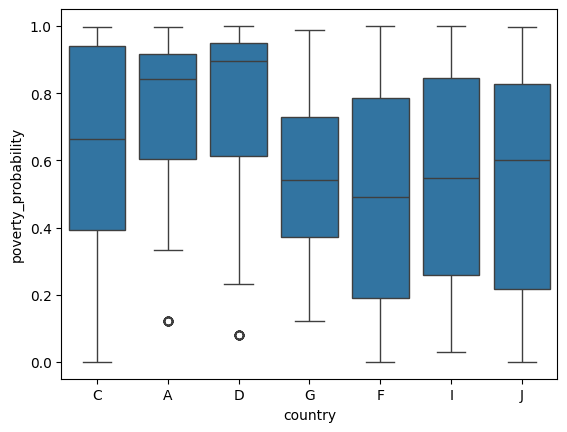

In [ ]:

#comparacion del ppi para diferentes paises
sns.boxplot(x='country', y='poverty_probability', data=df)

Se observa que en los paises A y D la probabilida de pobreza es mayor que en los demas, tambien en estos paises los valores estan menos distribuidos ya que la diferencia entre los cuartiles menor y mayor, osea el largo de la caja, es menor que en los demas paises.
Al mismo tiempo en los mismos dos paises es en los unicos que se observan valores atipicos, por lo anterior se podria deducir una mayor desigualdad economica en estos paises.
Si se tuviera informacion de los paises denominados "A" y "D" y la desigualdad se confirmara se podria suponer que la desigualdad economica afecta a la agudizacion de la pobreza de ese pais.

### Impacto del género en la pobreza:
¿Ser mujer afecta a la pobreza de una persona?

<Axes: xlabel='female', ylabel='poverty_probability'>

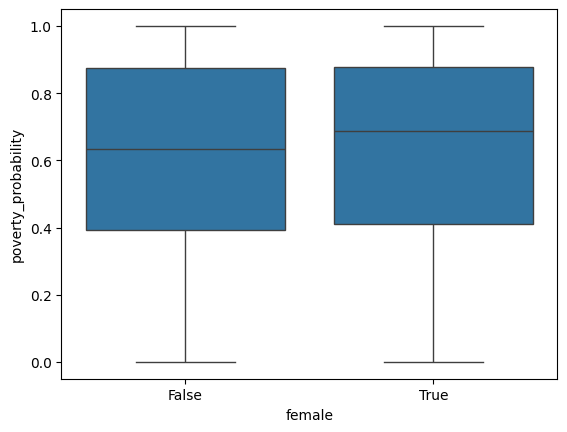

In [ ]:
#Comparacion del ppi para diferentes generos
df_filtrado =df_dep[(df_dep['age'] >= 40)]
sns.boxplot(x='female', y='poverty_probability', data=df_filtrado)

El grafico de cajas muestra una pequeña diferencia de mayor indice de pobreza para el genero femenino, para poder ver mas detalle de esto a continuacion se muestra un grafico de barras del indice de pobreza desglozado por nivel educativo:

<Axes: xlabel='education_level', ylabel='poverty_probability'>

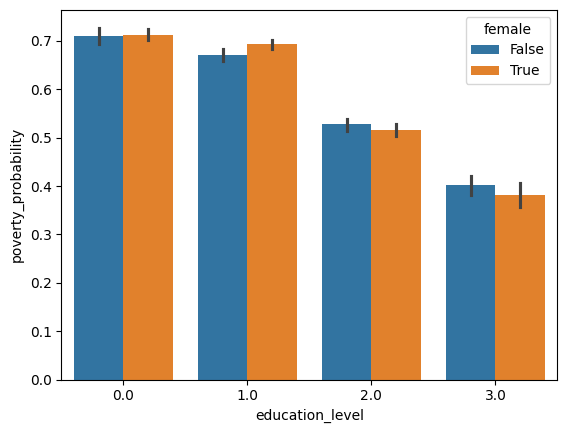

In [ ]:
#Comparacion del ppi para diferentes generos desglosando por nivel educativo
sns.barplot(x='education_level', y='poverty_probability', hue='female', data=df_dep)

Vemos que el indice para el genero femenino comparando con masculino es similar y mayor para un nivel educativo bajo, de 0 y 1 respectivamente, pero considerablemente menor para un nivel educativo mayor lo que podria leerse como a la educacion un factor fuerte a la hora de disminuir la pobreza de poblacion femenina.

### interacción entre múltiples variables:

Text(0.5, 1.02, 'Relación entre Nivel Educativo, Edad, Género e Índice de Pobreza')

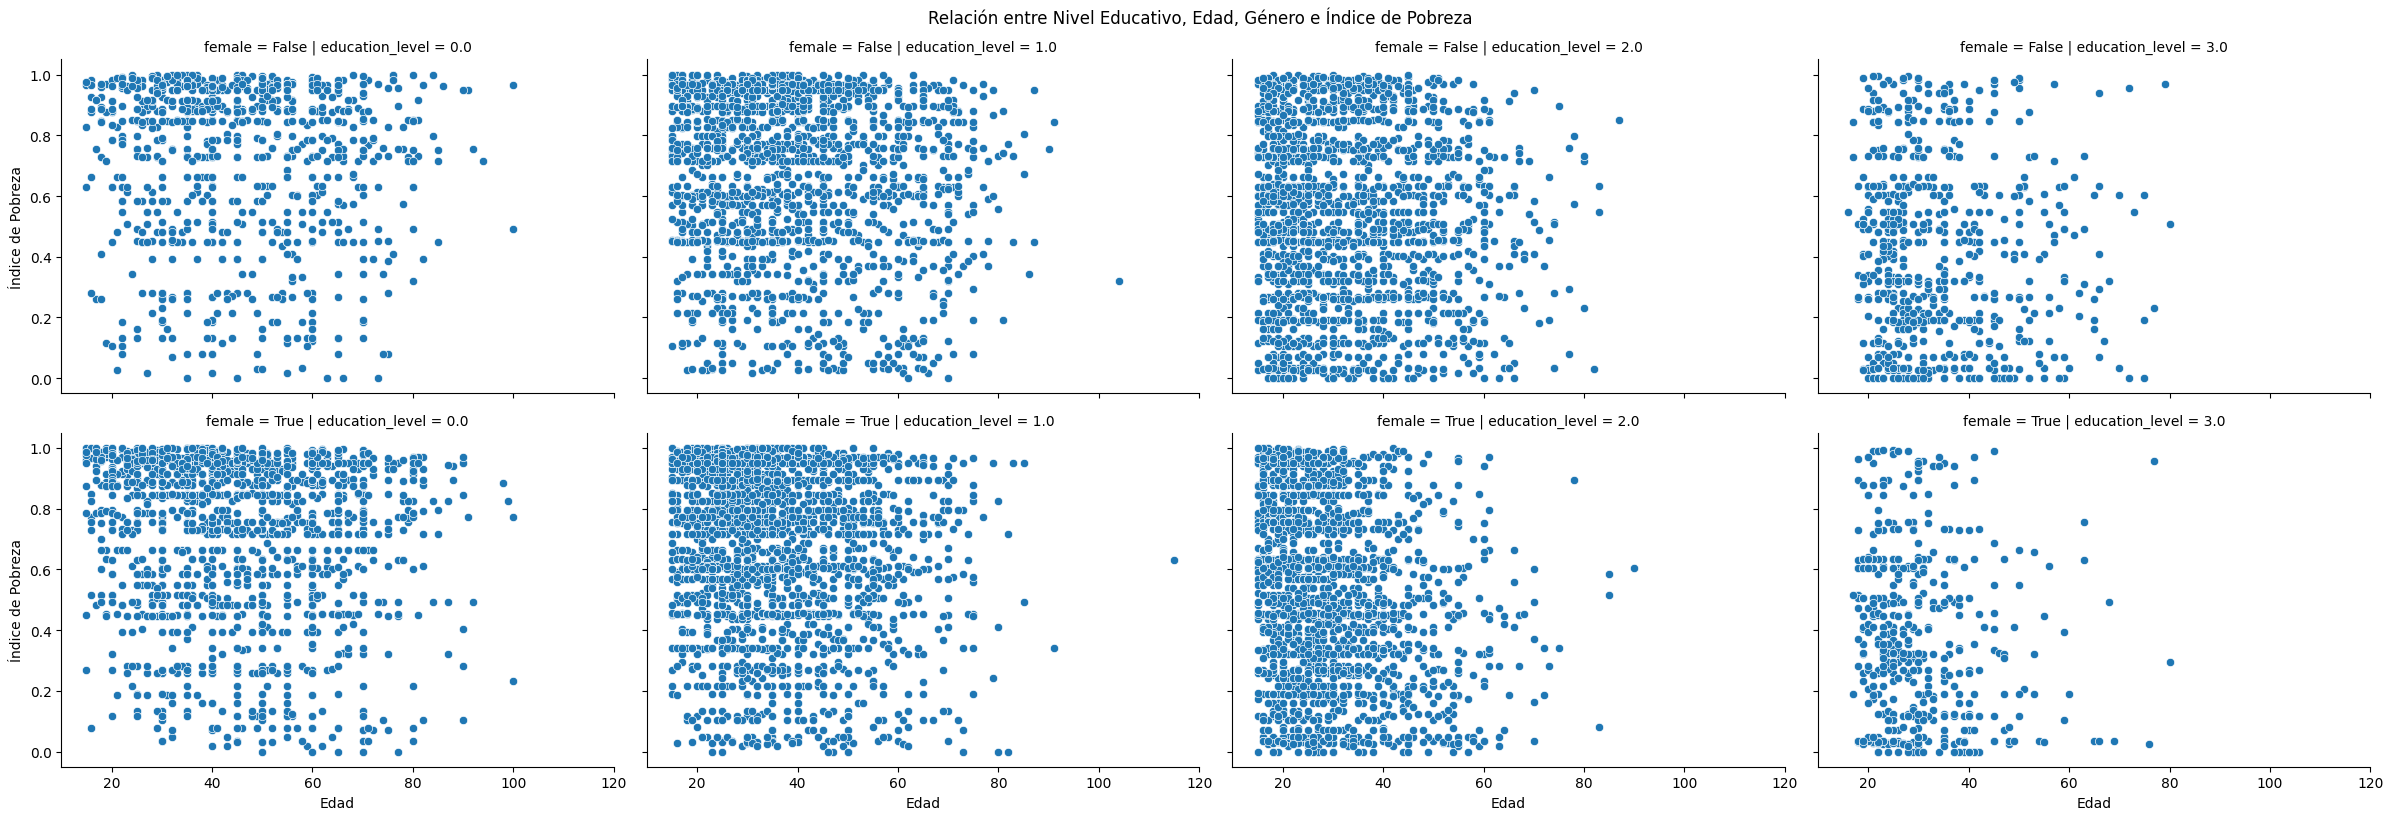

In [ ]:
# FacetGrid con las relaciones entre el índice de pobreza, nivel educativo, edad y género
g = sns.FacetGrid(df_dep, col='education_level', row='female', height=4, aspect=1.5)

# visualizacion del índice de pobreza según diferentes combinaciones de variables
g.map(sns.scatterplot, 'age', 'poverty_probability').add_legend()

# etiquetas y título
g.set_axis_labels('Edad', 'Índice de Pobreza')
g.fig.suptitle('Relación entre Nivel Educativo, Edad, Género e Índice de Pobreza', y=1.02)


A simple vista no se ve una gran diferencia entre los valores hombres y mujeres, si se observa que se tienen mas datos mara una edad entre 20 y 40 pero no se ve una influencia clara en la pobreza. Donde si se observa una diferencia de valores es al mirar el nivel educativo, cuanto mayor es menor es el indice

###Conclusiones

El anterior analisis es un apoyo para poder pensar cuales son algunos de los factores economicos/sociales que afectan la calidad de vida de una poblacion.

Estudiando la influencia de la educacion en la pobreza, la tendencia es que al aumentar la educacion de una persona disminuye su indice de pobreza drasticamente por ejemplo la diferencia entre tener un nivel cero y uno 3 en educacion significa aproximadamente un 35% de disminucion del ppi. Ante esta realidad la inversion en educacion y el trabajo para asegurar el acceso a la educacion por parte del gobierno de estos paises parece fundamental si se quiere que su poblacion tenga una mejor calidad de vida.

Al comparar el nivel de pobreza para diferentes paises se observa que en aquellos en que es mayor tambien es en los cuales los valores de pobreza estan menos distribuidos y en los unicos que se observan valores atipicos,esto habla de una desigualdad mayor en la poblacion, lo que marca una relacion entre desigualdad y asentuacion de la pobreza en sierto sector de la poblacion y hace pensar en que politicas tanto economicas como sociales que ayuden a la re-distribucion de la riqueza pueden favorecer el nivel de vida de gran parte de la poblacion.

La educacion se marca como un factor fuerte a la hora de disminuir la pobreza de poblacion femenina por lo que se ve  necesario reforzar politicas educativas en esta poblacion con acciones especificas no pasando por alto la desigualdad existente.

#Obtención de insights

Complementando el analisis exploratorio de la seccion anterior se continuan estudiando las relaciones entre las distintas variables del dataframe. Se obtendra un informe de los datos utilizando la libreria pandas profiling y me centrare en observar, utilizando la tabla de la seccion correlaciones, las correlaciones con la variable target que es la probabilidad de pobreza.

In [ ]:
#Instalando Pandas Profiling
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


In [ ]:
#Importamos las librerias
import numpy as np
import pandas as pd
import pandas_profiling


<ipython-input-31-0837ab2d7fde>:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [ ]:
#Identificacion de la columna probabilidad de pobreza como mi variable target
df_dep.rename(columns={'poverty_probability': 'target'}, inplace=True)
df_dep.head()

,row_id,country,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,literacy,...,financially_included,active_bank_user,active_mm_user,active_formal_nbfi_user,active_informal_nbfi_user,nonreg_active_mm_user,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year,target
0,0,C,False,18,True,True,P,Other,1.0,True,...,True,True,False,False,False,False,1,0,1,0.515
1,1,C,True,30,True,True,P,Other,1.0,True,...,True,True,False,False,False,False,1,0,0,0.981
2,2,A,False,20,True,True,Q,Spouse,1.0,True,...,False,False,False,False,False,False,0,0,0,0.982
3,3,A,False,61,False,True,Q,Head,0.0,False,...,False,False,False,False,False,False,0,0,0,0.879
4,4,D,False,26,True,True,X,Spouse,1.0,True,...,False,False,False,False,False,False,1,0,3,0.796


In [ ]:
#generacion del reporte de los datos con pandas profiling
profile=pandas_profiling.ProfileReport(df_dep)
profile

Output hidden; open in https://colab.research.google.com to view.

En el reporte se observa que las correlaciones mas grandes en valor con la variable target vienen de variables que reflejan el nivel educativo y el acceso a informacion y formas de comunicarse.

A continuacion se re afirma y se calcula la correlacion entre la pp y las variables educacion y pais, se utiliza la correlacion de spearman al estar ante el caso de una variable numerica y otra categorica.

In [ ]:
#Correlaciones entre target y : nivel educativo, genero.
print(df_dep[['target', 'education_level']].corr(method='spearman'))



                   target  education_level
target           1.000000        -0.342524
education_level -0.342524         1.000000


In [ ]:
print(df_dep[['target','female']].corr(method='spearman'))

          target    female
target  1.000000  0.057796
female  0.057796  1.000000


El estudio del nivel educativo y genero vs ipp, asi como la influencia del pais sobre el ipp se analiza el la seccion EDA.

#Entrenamiento de un algoritmo de Machine Learning (RandomForestRegressor)

##Encoding

In [ ]:
#Llamada al dataset a usar
df= df_dep
df_dep.head()

,row_id,country,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,literacy,...,financially_included,active_bank_user,active_mm_user,active_formal_nbfi_user,active_informal_nbfi_user,nonreg_active_mm_user,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year,target
0,0,C,False,18,True,True,P,Other,1.0,True,...,True,True,False,False,False,False,1,0,1,0.515
1,1,C,True,30,True,True,P,Other,1.0,True,...,True,True,False,False,False,False,1,0,0,0.981
2,2,A,False,20,True,True,Q,Spouse,1.0,True,...,False,False,False,False,False,False,0,0,0,0.982
3,3,A,False,61,False,True,Q,Head,0.0,False,...,False,False,False,False,False,False,0,0,0,0.879
4,4,D,False,26,True,True,X,Spouse,1.0,True,...,False,False,False,False,False,False,1,0,3,0.796


In [ ]:
# Modifying data
columnas_a_mantener = ['row_id','age','education_level','share_hh_income_provided','num_times_borrowed_last_year','num_shocks_last_year','avg_shock_strength_last_year','borrowing_recency','phone_technology','phone_ownership','num_formal_institutions_last_year','num_informal_institutions_last_year','num_financial_activities_last_year','target']

# Obtener todas las columnas excepto la que se desea mantener
columnas_a_codificar = [col for col in df_dep.columns if col not in columnas_a_mantener]

# Aplico One-Hot Encoding a las columnas excepto las que se desea mantener
df_mod = pd.get_dummies(df_dep, columns=columnas_a_codificar)
print(df_mod)

       row_id  age  education_level  num_times_borrowed_last_year  \
0           0   18              1.0                             0   
1           1   30              1.0                             0   
2           2   20              1.0                             1   
3           3   61              0.0                             0   
4           4   26              1.0                             0   
...       ...  ...              ...                           ...   
12595   12595   50              1.0                             1   
12596   12596   90              0.0                             0   
12597   12597   52              1.0                             0   
12598   12598   40              0.0                             1   
12599   12599   24              2.0                             0   

       borrowing_recency  num_shocks_last_year  avg_shock_strength_last_year  \
0                      0                     0                           0.0   
1          

In [ ]:
# Imprimir los nombres de las columnas
nombres_columnas = df_mod.columns.tolist()
print(nombres_columnas)

['row_id', 'age', 'education_level', 'num_times_borrowed_last_year', 'borrowing_recency', 'num_shocks_last_year', 'avg_shock_strength_last_year', 'phone_technology', 'phone_ownership', 'num_formal_institutions_last_year', 'num_informal_institutions_last_year', 'num_financial_activities_last_year', 'target', 'country_A', 'country_C', 'country_D', 'country_F', 'country_G', 'country_I', 'country_J', 'is_urban_False', 'is_urban_True', 'female_False', 'female_True', 'married_False', 'married_True', 'religion_N', 'religion_O', 'religion_P', 'religion_Q', 'religion_X', 'relationship_to_hh_head_Father/Mother', 'relationship_to_hh_head_Head', 'relationship_to_hh_head_Other', 'relationship_to_hh_head_Sister/Brother', 'relationship_to_hh_head_Son/Daughter', 'relationship_to_hh_head_Spouse', 'relationship_to_hh_head_Unknown', 'literacy_False', 'literacy_True', 'can_add_False', 'can_add_True', 'can_divide_False', 'can_divide_True', 'can_calc_percents_False', 'can_calc_percents_True', 'can_calc_comp

In [ ]:
#Elimino columnas redundantes
columnas_a_eliminar = ['is_urban_False','female_False','married_False','literacy_False','can_add_False','can_divide_False','can_calc_percents_False','can_calc_compounding_False','employed_last_year_False','income_ag_livestock_last_year_False','income_friends_family_last_year_False','income_government_last_year_False','income_own_business_last_year_False','income_private_sector_last_year_False','income_public_sector_last_year_False','formal_savings_False','informal_savings_False','cash_property_savings_False','has_insurance_False','has_investment_False','borrowed_for_emergency_last_year_False','borrowed_for_daily_expenses_last_year_False','borrowed_for_home_or_biz_last_year_False','can_call_False','can_text_False','can_use_internet_False','can_make_transaction_False','advanced_phone_use_False','reg_bank_acct_False','reg_mm_acct_False','reg_formal_nbfi_account_False','financially_included_False','active_bank_user_False','active_mm_user_False','active_formal_nbfi_user_False','active_informal_nbfi_user_False','nonreg_active_mm_user_False']

# Eliminar las columnas especificadas
df_mod = df_mod.drop(columns=columnas_a_eliminar)
df_mod.head()

,row_id,age,education_level,num_times_borrowed_last_year,borrowing_recency,num_shocks_last_year,avg_shock_strength_last_year,phone_technology,phone_ownership,num_formal_institutions_last_year,...,advanced_phone_use_True,reg_bank_acct_True,reg_mm_acct_True,reg_formal_nbfi_account_True,financially_included_True,active_bank_user_True,active_mm_user_True,active_formal_nbfi_user_True,active_informal_nbfi_user_True,nonreg_active_mm_user_True
0,0,18,1.0,0,0,0,0.0,0,1,1,...,False,True,False,False,True,True,False,False,False,False
1,1,30,1.0,0,0,0,0.0,1,2,1,...,False,True,False,False,True,True,False,False,False,False
2,2,20,1.0,1,2,0,0.0,1,2,0,...,False,False,False,False,False,False,False,False,False,False
3,3,61,0.0,0,0,0,0.0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,4,26,1.0,0,0,0,0.0,0,1,1,...,False,False,False,False,False,False,False,False,False,False


##Feature Engineering: Implementacion de forward selection


In [ ]:
def forward_selection(data, target, column_names, significance_level):
    """
    Implementación de la selección de características hacia adelante.

    Parámetros:
      - data: array de NumPy o DataFrame de Pandas con las características
      - target: array de NumPy o Series de Pandas con la variable objetivo
      - column_names: lista con los nombres de las columnas
      - significance_level: nivel de significancia para seleccionar características

    Retorna:
      - best_features: lista con las características seleccionadas como mejores
    """
    initial_features = column_names
    best_features = []
    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features, dtype='float64')
        for new_column in remaining_features:
            # Aquí debes ajustar el código para realizar las pruebas estadísticas
            # utilizando los datos y el objetivo, y almacenar los resultados en new_pval
            pass
        min_p_value = new_pval.min()
        if min_p_value < significance_level:
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
#df sin la variable target
X= df_mod.drop("target",axis=1)
#variable target
y = df_mod['target']

In [ ]:
X

,row_id,age,education_level,num_times_borrowed_last_year,borrowing_recency,num_shocks_last_year,avg_shock_strength_last_year,phone_technology,phone_ownership,num_formal_institutions_last_year,...,advanced_phone_use_True,reg_bank_acct_True,reg_mm_acct_True,reg_formal_nbfi_account_True,financially_included_True,active_bank_user_True,active_mm_user_True,active_formal_nbfi_user_True,active_informal_nbfi_user_True,nonreg_active_mm_user_True
0,0,18,1.0,0,0,0,0.0,0,1,1,...,False,True,False,False,True,True,False,False,False,False
1,1,30,1.0,0,0,0,0.0,1,2,1,...,False,True,False,False,True,True,False,False,False,False
2,2,20,1.0,1,2,0,0.0,1,2,0,...,False,False,False,False,False,False,False,False,False,False
3,3,61,0.0,0,0,0,0.0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,4,26,1.0,0,0,0,0.0,0,1,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595,12595,50,1.0,1,2,0,0.0,1,2,2,...,False,True,False,False,True,False,False,False,False,False
12596,12596,90,0.0,0,0,0,0.0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
12597,12597,52,1.0,0,0,1,5.0,2,2,0,...,False,False,True,False,True,False,False,False,True,False
12598,12598,40,0.0,1,2,0,0.0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
y

0        0.515
1        0.981
2        0.982
3        0.879
4        0.796
         ...  
12595    0.990
12596    0.950
12597    0.342
12598    0.846
12599    0.569
Name: target, Length: 12600, dtype: float64

In [ ]:
column_names = X.columns.tolist()

X_array = np.asarray(X)
y_array=np.asarray(y)

In [ ]:
#la funcion forward_selection se aplica ahora a mis datos
import numpy as np

forward_best_features = forward_selection(X_array,y_array,column_names,significance_level=0.005)
forward_best_features

[]

##Eleccion del algoritmo a entrenar
Dado que mi variable target es numerica utilizare Random Forest, un algoritmo de regresion lineal para entrenar con los datos obtenidos hasta el momento.

In [ ]:
### Load relevant packages
import statsmodels.formula.api as sm
modelo = 'target ~ education_level+country+is_urban+phone_technology+age+employment_type_last_year+num_financial_activities_last_year+num_shocks_last_year+married+can_make_transaction+relationship_to_hh_head+phone_ownership+reg_bank_acct+income_friends_family_last_year+can_text+income_private_sector_last_year+borrowing_recency+has_investment+literacy+religion+income_government_last_year+can_use_internet+can_add+formal_savings'
#Definicion del modelo
lm = sm.ols(formula = modelo, data = df_dep).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     176.3
Date:                Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                        18:27:50   Log-Likelihood:                 479.67
No. Observations:               12364   AIC:                            -877.3
Df Residuals:                   12323   BIC:                            -573.0
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

##Validacion del modelo

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [ ]:
df_ =df_mod.dropna()
#df sin la variable target
X= df_.drop("target",axis=1)
#variable target
y = df_['target']


In [ ]:
X_encoded = pd.get_dummies(X)


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Separación en entrenamiento/test en razón 80/20
X_train, X_test, y_train, y_test =train_test_split(X_encoded, y, test_size = 0.2)

# Creamos un modelo Random Forest con parámetros por defecto
modelo_regresion = RandomForestRegressor()
modelo_regresion.fit(X_train, y_train)

# Obtenemos las predicciones del modelo con X_test
predicciones = modelo_regresion.predict(X_test)
predicciones_train = modelo_regresion.predict(X_train)

In [ ]:
print(X_train)
print(y_train)

       row_id  age  education_level  num_times_borrowed_last_year  \
9306     9306   33              0.0                             0   
5736     5736   78              1.0                             0   
2085     2085   38              2.0                             1   
5636     5636   35              0.0                             0   
10393   10393   18              2.0                             1   
...       ...  ...              ...                           ...   
2065     2065   24              2.0                             0   
12039   12039   31              1.0                             2   
10392   10392   30              2.0                             0   
11506   11506   22              2.0                             0   
2614     2614   55              1.0                             0   

       borrowing_recency  num_shocks_last_year  avg_shock_strength_last_year  \
9306                   0                     1                           3.0   
5736       

##Métricas e interpretacion

In [ ]:
#RMSE
from sklearn.metrics import mean_squared_error

print("RMSE",np.sqrt(mean_squared_error(y_train,predicciones_train)))

RMSE 0.08442751404065639


In [ ]:
print("RMSE",np.sqrt(mean_squared_error(y_test,predicciones)))

RMSE 0.22374833109078568


Dado que el error cuadrático medio (RMSE) se puede interpretar como la diferencia promedio esperada entre un valor predicho y el valor real los resultados anteriores  significan que los valores en el entrenamiento difiere un 8 puntos porcentuales del indice de pobreza del valor real y en los datos predichos aumenta a 22% lo que es una desviacion muy grande y muestra que el algoritmo no es demasiado exacto.


In [ ]:
#R Cuadrado
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predicciones)
print(r2)

0.4027802811037622


Dado que el indicador R2 es bajo se concluye que el modelo planteado no explica la mayoria de la variabilidad de los datos.

## Comparacion de la aplicacion de RandomForest eligiendo por mi cuenta pocas variables consideradas relevantes

In [ ]:
print(df_dep)

       row_id country  is_urban  age  female  married religion  \
0           0       C     False   18    True     True        P   
1           1       C      True   30    True     True        P   
2           2       A     False   20    True     True        Q   
3           3       A     False   61   False     True        Q   
4           4       D     False   26    True     True        X   
...       ...     ...       ...  ...     ...      ...      ...   
12595   12595       C      True   50   False     True        P   
12596   12596       D     False   90   False    False        O   
12597   12597       J     False   52    True    False        X   
12598   12598       I     False   40   False     True        Q   
12599   12599       D      True   24   False    False        X   

      relationship_to_hh_head  education_level  literacy  ...  \
0                       Other              1.0      True  ...   
1                       Other              1.0      True  ...   
2           

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# Seleccion de las columnas edad, pais, educacion y la variable target pobreza
df_subset = df_dep[['age', 'country', 'education_level','female','relationship_to_hh_head','financially_included','phone_technology', 'target']]
df_subset=df_subset.dropna()

# Dividir los datos en conjunto de entrenamiento y prueba
X = df_subset[['age', 'country', 'education_level','female','relationship_to_hh_head','financially_included','phone_technology']]  # Características
y = df_subset['target']  # Variable target

In [ ]:
X_encoded = pd.get_dummies(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2)

In [ ]:
# Inicializar el regresor RandomForest
rf_regressor = RandomForestRegressor()
# Entrenar el regresor
rf_regressor.fit(X_train, y_train)
# Predecir en el conjunto de prueba
y_pred = rf_regressor.predict(X_test)


In [ ]:
#R Cuadrado
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.19874538084398397


Al mirar el indice R cuadrado y ver que disminuyo se ve que en este caso no conviene elegir pocas variables relevantes, no mejora el algoritmo.

#Data Wrangling


##Limpieza
Aunque en una etapa previa al Data Wrangling se ha limpiado el dataframe, a continuacion se buscaran duplicados y en caso de encontrar filas duplicadas se eliminaran ya que esa informacion no suma a los datos. Tambien se buscara identificar los datos nulos para despues decidir como tratarlos.

In [ ]:
#Busqueda de filas duplicadas
df_dep.duplicated().sum()

0

In [ ]:
#Columnas con datos nulos
columnas_con_nulos = df_dep.columns[df_dep.isnull().any()]
print("Columnas con datos nulos:")
print(columnas_con_nulos)

Columnas con datos nulos:
Index(['education_level'], dtype='object')


In [ ]:
# Proporción de datos nulos en cada columna que tiene al menos un nulo
proporcion_nulos_por_columna = df_dep[columnas_con_nulos].isnull().mean()
print("Proporción de datos nulos por columna:")
print(proporcion_nulos_por_columna)

Proporción de datos nulos por columna:
education_level    0.01873
dtype: float64


Dado que la proporcion de nulos en la unica columna con nulos es muy pequeña, menor al 2%, se quitaran las filas donde esten esos nulos correspondientes a la columna de nivel de educacion.

In [ ]:
# Eliminacion de las filas con valores nulos en la columna "nivel de educacion"
df_dep_sin_nulos = df_dep.dropna(subset=['education_level'])
DF=df_dep_sin_nulos #El dataframe sin duplicados y sin nulos ahora se llama "DF"
DF.head()

,row_id,country,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,literacy,...,financially_included,active_bank_user,active_mm_user,active_formal_nbfi_user,active_informal_nbfi_user,nonreg_active_mm_user,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year,target
0,0,C,False,18,True,True,P,Other,1.0,True,...,True,True,False,False,False,False,1,0,1,0.515
1,1,C,True,30,True,True,P,Other,1.0,True,...,True,True,False,False,False,False,1,0,0,0.981
2,2,A,False,20,True,True,Q,Spouse,1.0,True,...,False,False,False,False,False,False,0,0,0,0.982
3,3,A,False,61,False,True,Q,Head,0.0,False,...,False,False,False,False,False,False,0,0,0,0.879
4,4,D,False,26,True,True,X,Spouse,1.0,True,...,False,False,False,False,False,False,1,0,3,0.796


##Exploracion de datos

In [ ]:
#Llamado a las primeras filas del Data frame
print(DF.head())

   row_id country  is_urban  age  female  married religion  \
0       0       C     False   18    True     True        P   
1       1       C      True   30    True     True        P   
2       2       A     False   20    True     True        Q   
3       3       A     False   61   False     True        Q   
4       4       D     False   26    True     True        X   

  relationship_to_hh_head  education_level  literacy  ...  \
0                   Other              1.0      True  ...   
1                   Other              1.0      True  ...   
2                  Spouse              1.0      True  ...   
3                    Head              0.0     False  ...   
4                  Spouse              1.0      True  ...   

   financially_included  active_bank_user  active_mm_user  \
0                  True              True           False   
1                  True              True           False   
2                 False             False           False   
3               

In [ ]:
# Verificacion del tamaño del DataFrame
tamano_df = df.shape
num_filas = tamano_df[0]
num_columnas = tamano_df[1]

print("tamano del DF:",tamano_df )
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

tamano del DF: (12600, 55)
Número de filas: 12600
Número de columnas: 55


In [ ]:
# Verificacion de los tipos de datos de cada columna
tipos_de_datos = DF.dtypes
print("Tipos de datos de cada columna:")
print(tipos_de_datos)

Tipos de datos de cada columna:
row_id                                     int64
country                                   object
is_urban                                    bool
age                                        int64
female                                      bool
married                                     bool
religion                                  object
relationship_to_hh_head                   object
education_level                          float64
literacy                                    bool
can_add                                     bool
can_divide                                  bool
can_calc_percents                           bool
can_calc_compounding                        bool
employed_last_year                          bool
employment_category_last_year             object
employment_type_last_year                 object
income_ag_livestock_last_year               bool
income_friends_family_last_year             bool
income_government_last_year          

In [ ]:
#Descripcion estadistica de los datos de las columnas
print(DF.describe())

             row_id           age  education_level  \
count  12364.000000  12364.000000     12364.000000   
mean    6310.514639     36.312763         1.316241   
std     3637.374988     15.121262         0.905442   
min        0.000000     15.000000         0.000000   
25%     3163.750000     25.000000         1.000000   
50%     6310.500000     33.000000         1.000000   
75%     9458.250000     45.000000         2.000000   
max    12599.000000    115.000000         3.000000   

       num_times_borrowed_last_year  borrowing_recency  num_shocks_last_year  \
count                  12364.000000       12364.000000          12364.000000   
mean                       0.654966           0.865254              1.093740   
std                        0.921934           0.960664              1.187929   
min                        0.000000           0.000000              0.000000   
25%                        0.000000           0.000000              0.000000   
50%                        0.0000

##Medida de desbalance

In [ ]:
# Umbrales para probabilidades bajas y altas
P_baja = 0.5
P_alta = 0.5

# Cuenta las probabilidades bajas y altas
probabilidades_bajas = DF[DF['target'] < P_baja].shape[0]
probabilidades_altas = DF[DF['target'] > P_alta].shape[0]

probabilidades_bajas


4440

In [ ]:
probabilidades_altas

7924

Se observa que el dataset esta desbalanceado, a continuacion se utilizara SMOTE para balancear el dataset para que el porcentaje de datos con probabilidad mayor a 0.5 sea igual a los que tienen una probabilidad mayor.

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np


In [ ]:
umbral_medio = 0.4

# Discretiza la columna de probabilidad en categorías alta, media y baja
DF['categoria_probabilidad'] = np.where(DF['target'] > umbral_medio, 'alta', 'baja')



<ipython-input-73-9145f2863c8b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['categoria_probabilidad'] = np.where(DF['target'] > umbral_medio, 'alta', 'baja')


In [ ]:
# Separa las características y la columna de categoría de probabilidad
X = DF.drop(['target', 'categoria_probabilidad'], axis=1)
y = DF['categoria_probabilidad']

In [ ]:
from sklearn.preprocessing import LabelEncoder
#Para usar SMOTE antes convierto las columnas a numericas
# Codifica las características categóricas usando LabelEncoder
label_encoder = LabelEncoder()
for columna in X.columns:
    if X[columna].dtype == 'object':  # Verifica si la columna es de tipo 'object' (categórica)
        X[columna] = label_encoder.fit_transform(X[columna])

# Mapea los valores verdadero/falso a 1/0
X.replace({'True': 1, 'false': 0}, inplace=True)

In [ ]:
print(y)

0        alta
1        alta
2        alta
3        alta
4        alta
         ... 
12595    alta
12596    alta
12597    baja
12598    alta
12599    alta
Name: categoria_probabilidad, Length: 12364, dtype: object


In [ ]:
# Aplica SMOTE
smote = SMOTE()

X_resampled, y_resampled = smote.fit_resample(X,y)


In [ ]:
y_resampled.value_counts()

categoria_probabilidad
alta    9208
baja    9208
Name: count, dtype: int64

#Entrenamiento de un segundo Algoritmo de Machine Learning con datos balanceados (RandomForestClassifier)

In [ ]:
#df a utilizar
df=DF.copy()

##Convercion de mi variable target de numerica a categorica

In [ ]:
# Convierto la columna target a tipo numérico.
df['target'] = pd.to_numeric(df['target'])

In [ ]:
 #Función para asignar categorías.
def asignar_categoria(valor):
    if valor >= 0.4:
        return 'Alta'
    else:
        return 'Baja'


##Reduccion de variables

In [ ]:
#Separamos en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
#Normalizamos los datos
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_standarized = sc.fit_transform(X_train)
X_test_standarized = sc.transform(X_test)

In [ ]:
#Aplicacion de PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train_standarized)
X_test = pca.transform(X_test_standarized)

In [ ]:
#Análisis de la varianza explicada para cada componente
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.16725294, 0.07510696, 0.05200111, 0.04365118, 0.04075094,
       0.0371626 , 0.03164148, 0.02639401, 0.02601184, 0.02493381,
       0.02209978, 0.02155875, 0.02060178, 0.01981942, 0.01912704,
       0.01875308, 0.01822095, 0.01775835, 0.01704245, 0.01580823,
       0.0154238 , 0.01477874, 0.01451963, 0.01389176, 0.01323001,
       0.0129429 , 0.01256601, 0.01204625, 0.0119238 , 0.01139012,
       0.01089742, 0.01057662, 0.01032379, 0.00998379, 0.00890248,
       0.00844408, 0.00837189, 0.00796547, 0.00731337, 0.00719794,
       0.00700915, 0.00689478, 0.00642341, 0.00589169, 0.00566591,
       0.00513562, 0.00444674, 0.00394974, 0.00355348, 0.00314166,
       0.00310417, 0.00278228, 0.0023482 , 0.00126661])

In [ ]:
print(len(explained_variance))
suma = sum(explained_variance[:40])
suma
#Al calcular la varianza que se acumula en los primeras 40 variables vemos que por ellas podemos explicar
#casi el 90 porciento de esta varianza y si nos quedamos solo con estas variables nos estariamos quedando con poco mas que la mitad
#de las variables


54


0.9383865679185827

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=40)
X_train_pca = pca.fit_transform(X_train_standarized)
X_test_pca = pca.transform(X_test_standarized)

##Aplicacion de RandomForestClassifier

In [ ]:
#Importacion RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Creación del modelo
model_rf_pca = RandomForestClassifier(max_depth=2, random_state=0)
model_rf_pca.fit(X_train_pca, y_train)

# Predicción
y_pred_pca = model_rf_pca.predict(X_test_pca)

In [ ]:
#Evaluación básica del modelo
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_pca,zero_division=1))

              precision    recall  f1-score   support

        alta       0.78      0.76      0.77      1909
        baja       0.75      0.77      0.76      1775

    accuracy                           0.76      3684
   macro avg       0.76      0.77      0.76      3684
weighted avg       0.77      0.76      0.77      3684



En este caso, para la clase "Alta", la precisión es del 80%, lo que significa que el 80% de las muestras clasificadas como "Alta" fueron clasificadas correctamente. Para la clase "Baja", significa que el 75% las muestras clasificadas como "Baja" fueron clasificadas correctamente.

Para la clase "Alta", el recall es del 76%, lo que significa que la mayoria de las muestras verdaderamente "Altas" fueron identificadas correctamente como "Altas". Para la clase "Baja", el recall es del 79%, lo que indica que este porcentaje de las muestras verdaderamente "Bajas" fue identificada correctamente como "Baja".

Para la clase "Alta", el F1-score es del 78%, lo que indica un buen equilibrio entre precision y recall. Para la clase "Baja", el F1-score es del 77%, lo que sugiere un buen rendimiento.

Sobre el Accuracy: La precisión global del modelo, que indica la proporción de muestras clasificadas correctamente independientemente de la clase. En este caso, la precisión global es del 77%.

En resumen, el modelo tiene un buen rendimiento tanto para la clase "Alta" como la "Baja" en términos de precisión, recall y F1-score.


Los anteriores resultados se explican si observamos la siguiente matriz de confusion:

<Axes: >

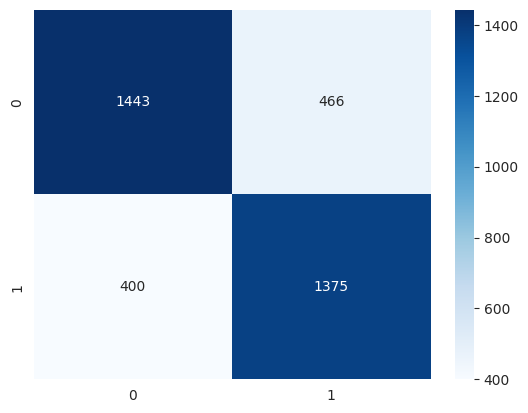

In [ ]:
#matriz de confusion
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mc=confusion_matrix(y_test,y_pred_pca)

# Visualiza la matriz de confusión usando un mapa de calor (heatmap)
sns.heatmap(mc, annot=True, cmap='Blues', fmt='g')

##Validacion cruzada

In [ ]:
# librerias
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# crear el procedimiento k-fold
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
skf.get_n_splits(X, y)

5

In [ ]:
train, test = list(skf.split(X, y))[0]

In [ ]:
# crear modelo
model = RandomForestClassifier(random_state=1,n_estimators=30, criterion="gini",max_depth=4)

In [ ]:
# evaluar el modelo
scores = cross_val_score(model, X, y, scoring='accuracy', cv=skf, verbose=1)
scores

array([0.77234129, 0.78892034, 0.77840679, 0.77072382, 0.77346278])

In [ ]:
# reportar el performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.777 (0.007)


##Optimizacion de hiperparametros

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

In [ ]:
# Separar en train y test
X_train,X_test, y_train, y_test = train_test_split(X_train_pca, y_train, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)

(10312, 40) (4420, 40)


In [ ]:
# Definir la distribución de hiperparámetros
params_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [ ]:
# Entrenar el modelo con Randomized Search
grid_cv = RandomizedSearchCV(model_rf_pca, params_grid, scoring="accuracy", n_jobs=-1, cv=3)
grid_cv.fit(X_train, y_train)


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=2,
                                                    random_state=0),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   scoring='accuracy')

In [ ]:
print("Mejores parametros", grid_cv.best_params_)
print("Mejor score de CV", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)}')

Mejores parametros {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
Mejor score de CV 0.8342705049234089
Accuracy del modelo = 0.83756


In [ ]:
# Utilizar el mejor estimador para hacer predicciones
best_model = grid_cv.best_estimator_
y_pred_pca = best_model.predict(X_test)

# Evaluar el rendimiento del modelo optimizado
print("Exactitud en el conjunto de prueba:", accuracy_score(y_test, y_pred_pca))
print(classification_report(y_test, y_pred_pca))

Exactitud en el conjunto de prueba: 0.8375565610859729
              precision    recall  f1-score   support

        alta       0.83      0.85      0.84      2244
        baja       0.84      0.82      0.83      2176

    accuracy                           0.84      4420
   macro avg       0.84      0.84      0.84      4420
weighted avg       0.84      0.84      0.84      4420



#Seleccion del modelo

 Más allá de si el objetivo del modelo es clasificación o regresión, podemos comparar los dos modelos considerando las métricas específicas que cada uno proporciona y determinando cuál tiene un rendimiento general superior en su contexto. Aunque estas métricas no son directamente comparables (porque miden diferentes cosas), podemos hacer una evaluación cualitativa del rendimiento de cada modelo en su contexto.

Regresión (RandomForestRegressor):

El modelo tiene un buen RMSE y un buen R², lo que sugiere que es razonablemente bueno para predecir valores continuos.
Sin embargo, un R² de 0.403 indica que aún hay un 60% de la varianza que no es explicada por el modelo, lo que deja margen para la mejora.
Clasificación (RandomForestClassifier):

El modelo muestra una alta exactitud y un equilibrio robusto en precision, recall y F1-Score.
El rendimiento es consistentemente bueno en términos de métricas estándar de clasificación, lo que sugiere que es eficaz en la categorización de datos.

Si consideramos la eficacia relativa en su propio contexto:
El RandomForestClassifier muestra una excelente capacidad de clasificación con métricas de desempeño muy equilibradas.
El RandomForestRegressor también es competente, pero hay más varianza en los datos que no está explicada por el modelo.
En resumen, si necesitamos hacer una comparación cualitativa sobre cuál modelo parece desempeñarse mejor en su dominio, el RandomForestClassifier tiene una ventaja debido a sus métricas más consistentes y equilibradas.